# MALIGNANT COMMENTS CLASSIFICATION

Problem Statement

The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection.
Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour.   
There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.    
Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as unoffensive, but “u are an idiot” is clearly offensive.
Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying. 


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
data=pd.read_csv('train.csv')

In [5]:
data.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


# Data Set Description

The data set contains the training set, which has approximately 1,59,000 samples and the test set which contains nearly 1,53,000 samples. All the data samples contain 8 fields which includes ‘Id’, ‘Comments’, ‘Malignant’, ‘Highly malignant’, ‘Rude’, ‘Threat’, ‘Abuse’ and ‘Loathe’. 
The label can be either 0 or 1, where 0 denotes a NO while 1 denotes a YES. There are various comments which have multiple labels. The first attribute is a unique ID associated with each comment.   
The data set includes:
-	Malignant: It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not. 
-	Highly Malignant: It denotes comments that are highly malignant and hurtful. 
-	Rude: It denotes comments that are very rude and offensive.
-	Threat: It contains indication of the comments that are giving any threat to someone. 	
-	Abuse: It is for comments that are abusive in nature. 
-	Loathe: It describes the comments which are hateful and loathing in nature.  
-	ID: It includes unique Ids associated with each comment text given.   
-	Comment text: This column contains the comments extracted from various social media platforms. 


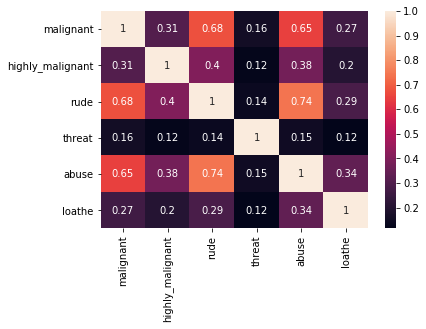

In [6]:
data_cor=data.corr()
sns.heatmap(data_cor,annot=True)

The correlation matrix tells the all the lables are significantly cor related , therefore predicting them individually would not work as the comments belongs to ne or more label.

In [7]:
data.drop('id',axis=1,inplace=True)

In [8]:
data

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [9]:
categories = list(data.columns[1:].values)

In [10]:
categories

['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']

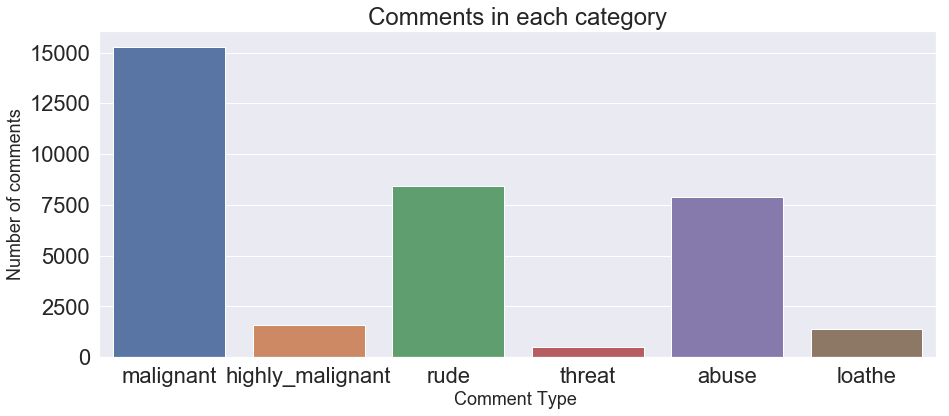

In [11]:
sns.set(font_scale = 2)
plt.figure(figsize=(15,6))
ax= sns.barplot(categories, data.iloc[:,1:].sum().values)
plt.title("Comments in each category", fontsize=24)
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Comment Type ', fontsize=18)
plt.show()

In [12]:
data.shape

(159571, 7)

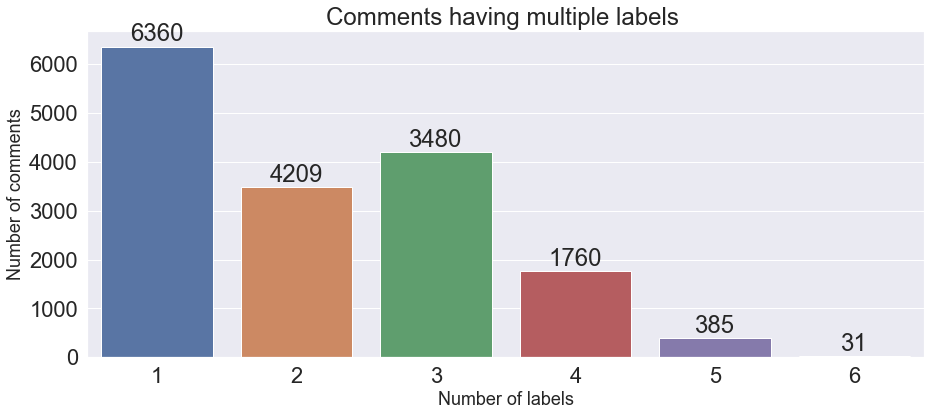

In [13]:
rowSums = data.iloc[:,1:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]
sns.set(font_scale = 2)
plt.figure(figsize=(15,6))
ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)
plt.title("Comments having multiple labels ")
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)
#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 7 columns):
comment_text        159571 non-null object
malignant           159571 non-null int64
highly_malignant    159571 non-null int64
rude                159571 non-null int64
threat              159571 non-null int64
abuse               159571 non-null int64
loathe              159571 non-null int64
dtypes: int64(6), object(1)
memory usage: 8.5+ MB


In [15]:
data.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


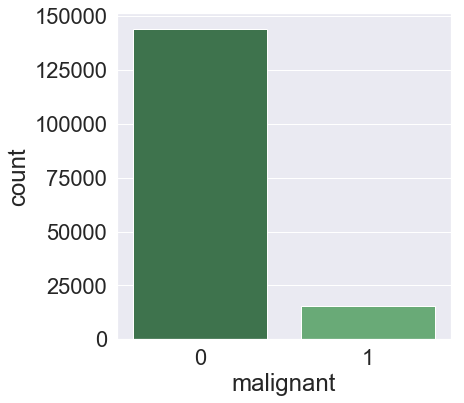

In [16]:
plt.figure(figsize=(6,6))
sns.countplot(x="malignant", data=data, palette="Greens_d")

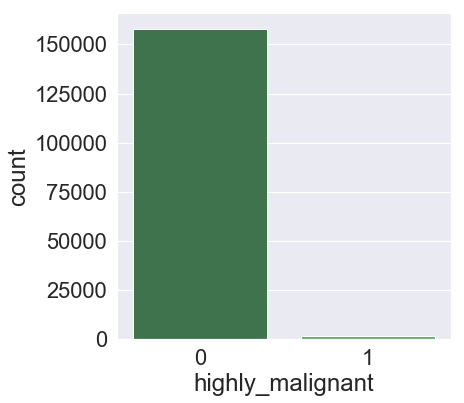

In [17]:
plt.figure(figsize=(6,6))
sns.countplot(x="highly_malignant", data=data, palette="Greens_d")

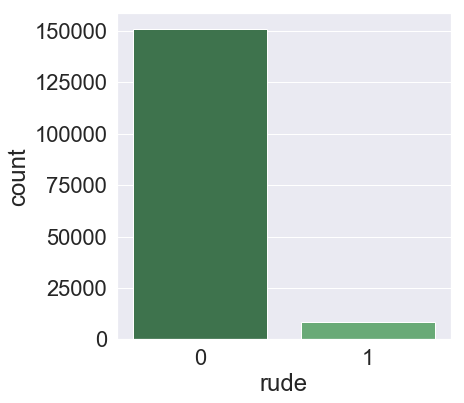

In [18]:
plt.figure(figsize=(6,6))
sns.countplot(x="rude", data=data, palette="Greens_d")

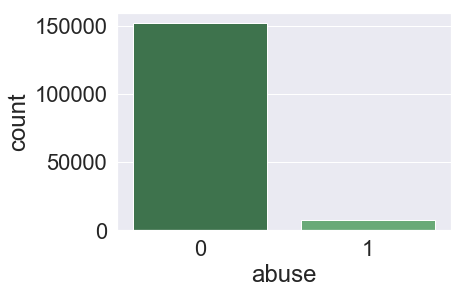

In [19]:
sns.countplot(x="abuse", data=data, palette="Greens_d")

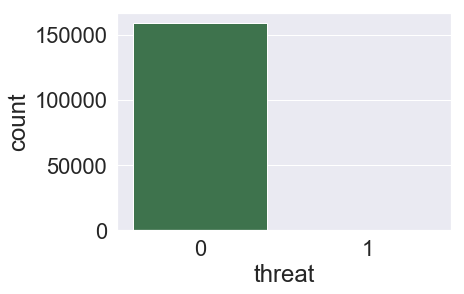

In [20]:
sns.countplot(x="threat", data=data, palette="Greens_d")

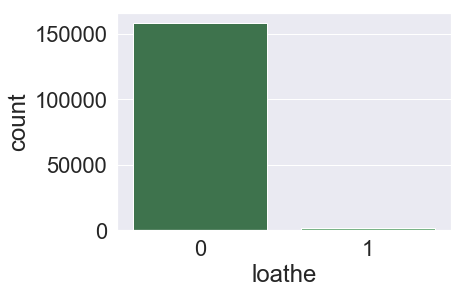

In [21]:
sns.countplot(x="loathe", data=data, palette="Greens_d")

In [22]:
data.isnull().sum()

comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

# Preprocessing News

In the Preprocessing phase we do the following in the order below:-

a) Begin by removing the html tags

b) Remove any punctuations or limited set of special characters like , or . or # etc.

c) Check if the word is made up of english letters and is not alpha-numeric

d) Check to see if the length of the word is greater than 2 (as it was researched that there is no adjective in 2-letters)

e) Convert the word to lowercase

f) Remove Stopwords

In [23]:
# printing some Messages
messg = data['comment_text'].values[0]
print(messg)
print('='*50)

Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27


In [24]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(messg, 'lxml')
text = soup.get_text()
print(text)
print("="*50)

Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27


In [25]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [26]:
messg_0 = decontracted(messg)
print(messg_0)
print("="*50)

Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They were not vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please do not remove the template from the talk page since I am retired now.89.205.38.27


In [27]:
#remove words with numbers 
messg_0 = re.sub("\S*\d\S*", "", messg_0).strip()
print(messg_0)

Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They were not vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please do not remove the template from the talk page since I am retired


In [28]:
#remove spacial character
messg_0 = re.sub('[^A-Za-z0-9]+', ' ', messg_0)
print(messg_0)

Explanation Why the edits made under my username Hardcore Metallica Fan were reverted They were not vandalisms just closure on some GAs after I voted at New York Dolls FAC And please do not remove the template from the talk page since I am retired


In [29]:
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [30]:
# Combining all 
from tqdm import tqdm
preprocessed_COMMENTS = []
# tqdm is for printing the status bar
for sentance in tqdm(data['comment_text'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_COMMENTS.append(sentance.strip())

 69%|█████████████████████████████████████████████████▌                      | 109781/159571 [00:47<00:17, 2864.75it/s]C:\Users\Fahad Ehtesham\Anaconda3\lib\site-packages\bs4\__init__.py:219: UserWarning: "b' .'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
100%|████████████████████████████████████████████████████████████████████████| 159571/159571 [01:06<00:00, 2384.05it/s]


In [32]:
data['preprocessed_COMMENTS']=preprocessed_COMMENTS
Y=data.columns[1:-1]

In [33]:
Y

Index(['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe'], dtype='object')

In [34]:
df_train=data.iloc[:100000,:]
df_test=data.iloc[100000:,:]

In [35]:
df_train

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,preprocessed_COMMENTS
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explanation edits made username hardcore metal...
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,aww matches background colour seemingly stuck ...
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,hey man really not trying edit war guy constan...
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,not make real suggestions improvement wondered...
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,sir hero chance remember page
...,...,...,...,...,...,...,...,...
99995,"My reference is a book, The Kemantney Language...",0,0,0,0,0,0,reference book kemantney language however figu...
99996,"""::: because there is 8 lines of text in the t...",0,0,0,0,0,0,lines text three sections list offices proport...
99997,"""\n\nIt says """"in"""" the country, not """"of"""" th...",0,0,0,0,0,0,says country not country
99998,"Renata, if you go on any Russian website you w...",0,0,0,0,0,0,renata go russian website find works published...


# Multi-Label Classification Techniques

In [36]:
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset

In [38]:
#SPLITTING THE DATA SET INTO TRAIN ,CV ,TEST DATA
#Here in order to prevent the data leakage we have splitted the data in train , cv , test repectively before transforming into Bow
X_train, X_test, y_train, y_test = train_test_split(df_train['preprocessed_COMMENTS'],df_train[Y], test_size=0.33 ,random_state=42) # this is random splitting
#Checking the shape of each data set
print("Checking the shape of each data set")
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print("-"*50)

Checking the shape of each data set
(67000,) (67000, 6)
(33000,) (33000, 6)
--------------------------------------------------


# TFIDF FEATURISATION

In [39]:
#Vectorizing using tfidf
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vect = TfidfVectorizer(max_features=20000)
tf_idf_vect.fit(X_train)
X_train_tfidf = tf_idf_vect.transform(X_train)
X_test_tfidf = tf_idf_vect.transform(X_test)
##########################################################################################################
#Checking the shape after Vectorization using tfidf
print("After vectorizations")
print(X_train_tfidf.shape,y_train.shape)# converted the text into numerical vector in the form of tfidf for the TRAIN data
print(X_test_tfidf.shape, y_test.shape)# converted the text into numerical vector in the form of tfidf for the TEST data
print("="*100)

After vectorizations
(67000, 20000) (67000, 6)
(33000, 20000) (33000, 6)


# Classifier Chains
A chain of binary classifiers C0, C1, . . . , Cn is constructed, where a classifier Ci uses the predictions of all the classifier Cj , where j < i. This way the method, also called classifier chains (CC), can take into account label correlations

In [40]:
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression
# initialize classifier chains multi-label classifier
classifier = ClassifierChain(MultinomialNB())
# Training logistic regression model on train data
classifier.fit(X_train_tfidf, y_train)
# predict
predictions = classifier.predict(X_test_tfidf)
# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

Accuracy =  0.9117878787878788




# Label Powerset
This approach does take possible correlations between class labels into account. More commonly this approach is called the label-powerset method, because it considers each member of the power set of labels in the training set as a single label.

In [38]:
# using Label Powerset
from skmultilearn.problem_transform import LabelPowerset
# initialize label powerset multi-label classifier
classifier_NB = LabelPowerset(MultinomialNB())
# train
classifier_NB.fit(X_train_tfidf, y_train)
# predict
predictions = classifier_NB.predict(X_test_tfidf)
# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

Accuracy =  0.9029090909090909




# Binary Relevance
In this case an ensemble of single-label binary classifiers is trained, one for each class. Each classifier predicts either the membership or the non-membership of one class. The union of all classes that were predicted is taken as the multi-label output. This approach is popular because it is easy to implement, however it also ignores the possible correlations between class labels.

In [39]:
# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB
# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier_BN_NB = BinaryRelevance(MultinomialNB())
# train
classifier_BN_NB.fit(X_train_tfidf, y_train)
# predict
predictions = classifier_BN_NB.predict(X_test_tfidf)
# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))

Accuracy =  0.9061818181818182


# Prediction on Unseen Data using classifier chain

Classifier chain has been selected the best method as it id giving the best accuracy and also maintaining the cor relation between the features

In [41]:
df_unseen=pd.read_csv('test.csv')

In [43]:
df_unseen['comment_text']

0         Yo bitch Ja Rule is more succesful then you'll...
1         == From RfC == \n\n The title is fine as it is...
2         " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3         :If you have a look back at the source, the in...
4                 I don't anonymously edit articles at all.
                                ...                        
153159    . \n i totally agree, this stuff is nothing bu...
153160    == Throw from out field to home plate. == \n\n...
153161    " \n\n == Okinotorishima categories == \n\n I ...
153162    " \n\n == ""One of the founding nations of the...
153163    " \n :::Stop already. Your bullshit is not wel...
Name: comment_text, Length: 153164, dtype: object

In [44]:
# Combining all 
from tqdm import tqdm
preprocessed_unseen = []
# tqdm is for printing the status bar
for sentance in tqdm(df_unseen['comment_text'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_unseen.append(sentance.strip())

100%|████████████████████████████████████████████████████████████████████████| 153164/153164 [01:25<00:00, 1783.22it/s]


In [45]:
X_unseen = tf_idf_vect.transform(preprocessed_unseen)

In [47]:
predictions = classifier.predict(X_unseen[:2000])

In [56]:
predictions.toarray()

array([[1., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])